<h2>Rotations</h2>

[Watch Lecture](https://youtu.be/bmrQhASbo34)

_We use certain tools from python library "<b>matplotlib.pyplot</b>" for drawing. Check the notebook [Python: Drawing](../python/Python06_Drawing.ipynb) for the list of these tools._

We start with drawing the quantum states $ \ket{0} $ and $ \ket{+} = \myvector{ \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}} } $.

<i style="font-size:10pt;">
Our predefined function "draw_qubit()" draws a figure, the origin, the axes, the unit circle, and base quantum states.
<br>
Our predefined function "draw_quantum_state(x,y,name)" draws an arrow from (0,0) to (x,y) and associates it with <u>name</u>.
<br>
We include our predefined functions with the following line of code:
    
    %run qlatvia.py
</i>   

Text(0.21, 0.09, 'π/4')

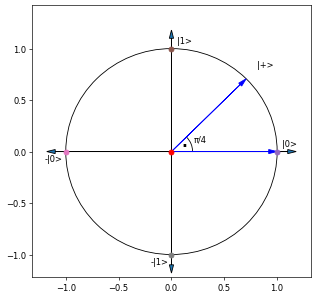

In [1]:
%run qlatvia.py

draw_qubit()

sqrttwo=2**0.5

draw_quantum_state(1,0,"")

draw_quantum_state(1/sqrttwo,1/sqrttwo,"|+>")

# drawing the angle with |0>-axis
from matplotlib.pyplot import gca, text
from matplotlib.patches import Arc
gca().add_patch( Arc((0,0),0.4,0.4,angle=0,theta1=0,theta2=45) )
text(0.08,0.05,'.',fontsize=30)
text(0.21,0.09,'\u03C0/4')

<h3> Task 1 (discussion) </h3>

Suppose that we start in state $ \ket{0} $, and then obtain state $\ket{+}$ by appling a rotation operator. 

If we apply the same operator consecutively, what can be the new quantum state?

Here are eight candidates:

$$
    \myarray{|c|c|c|c|}{
        \hline
        A & \ket{0} = \vzero & E & \ket{+} = \myrvector{\sqrttwo \\ \sqrttwo}
        \\ \hline
        B & \ket{1} = \vone & F & \ket{-} = \myrvector{\sqrttwo \\ -\sqrttwo}
        \\ \hline
        C & -\ket{0} = \myrvector{-1 \\ 0} & G & -\ket{+} = \myrvector{-\sqrttwo \\ -\sqrttwo}
        \\ \hline
        D & -\ket{1} = \myrvector{0 \\ -1} & H & -\ket{-} = \myrvector{-\sqrttwo \\ \sqrttwo}
        \\ \hline
    }
$$

<h3> Rotation with degree $\pi/4$ </h3>

Its matrix form is similar to Hadamard operator:

$$ R(\pi/4) = \mymatrix{rr}{\cos(\pi/4) & -\sin(\pi/4) \\ \sin(\pi/4) & \cos(\pi/4) }
= \mymatrix{rr}{ \sqrttwo & -\sqrttwo \\  \sqrttwo & \sqrttwo} $$.

<h3> Task 2 </h3>

Start with state $ \ket{0} $. 

Apply $ R(\pi/4) $ 7 times, and draw each state on the unit circle.

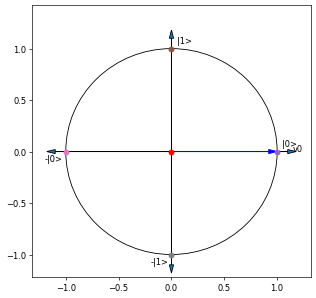

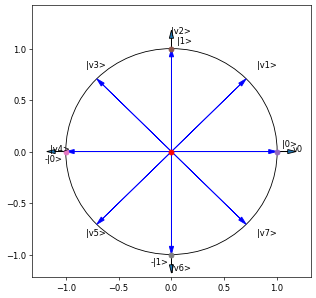

In [2]:
%run qlatvia.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

sqrttwo = 2**0.5
oversqrttwo = 1/sqrttwo

R = [ [oversqrttwo, -1*oversqrttwo], [oversqrttwo,oversqrttwo] ]

#
# your code is here
#
# 
%run qlatvia.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

sqrttwo = 2**0.5
oversqrttwo = 1/sqrttwo

R = [ [oversqrttwo, -1*oversqrttwo], [oversqrttwo,oversqrttwo] ]

# function for rotation R
def rotate(px,py):
    newx = R[0][0]*px + R[0][1]*py
    newy = R[1][0]*px + R[1][1]*py
    return [newx,newy]

# apply rotation R 7 times
for i in range(1,8):
    [x,y] = rotate(x,y)
    draw_quantum_state(x,y,"|v"+str(i)+">")


<h3>Reading the quantum state of a circuit</h3>

The backend "statevector_simulator" of Qiskit reads the quantum state of the circuit at that point. It is a classical simulator, and, if any measurement operator is defined, it implements this measurement operator and continues by following one of the possible outcomes. 

We can read the current state of a circuit as follows:

    job = execute(quantum_circuit,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state = job.result().get_statevector(quantum_circuit)
    
"current_quantum_state" is the list of amplitudes, which are complex numbers. For example, the real part of the amplitide of the first state is printed as follows:

    print(current_quantum_state[0].real)

<h3> Task 3 </h3>

We implement Task 2 by using "ry-gate" and "statevector_simulator".

Define a quantum circuit with one qubit. 

Iterate seven times
- Apply the rotation with angle $ \pi \over 4 $ by using ry-gate
- Read the current quantum state
- Print the current quantum state
- Draw the quantum state on the unit circle by using the values of the current quantum state

iteration 1 : the quantum state is ( 0.707 ) |0> +( 0.707 ) |1>
iteration 2 : the quantum state is ( 0.0 ) |0> +( 1.0 ) |1>
iteration 3 : the quantum state is ( -0.707 ) |0> +( 0.707 ) |1>
iteration 4 : the quantum state is ( -1.0 ) |0> +( 0.0 ) |1>
iteration 5 : the quantum state is ( -0.707 ) |0> +( -0.707 ) |1>
iteration 6 : the quantum state is ( 0.0 ) |0> +( -1.0 ) |1>
iteration 7 : the quantum state is ( 0.707 ) |0> +( -0.707 ) |1>
iteration 8 : the quantum state is ( 1.0 ) |0> +( 0.0 ) |1>


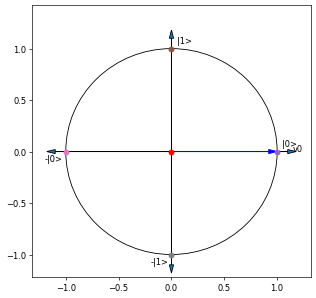

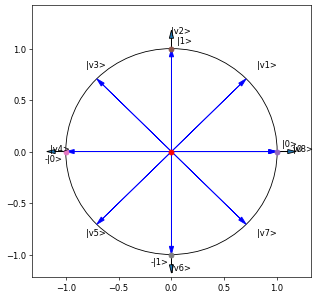

In [3]:
%run qlatvia.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

#
# your code is here
#
#
%run qlatvia.py

draw_qubit()

[x,y]=[1,0]

draw_quantum_state(x,y,"v0")

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

rotation_angle = pi/4

for i in range(1,9):
    # rotate the qubit with angle pi/4
    qc.ry(2*rotation_angle,q[0]) 
    
    # read the current quantum state
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state=job.result().get_statevector(qc) 
    
    # print the current quantum state    
    x_value = current_quantum_state[0].real # get the amplitude of |0>
    y_value = current_quantum_state[1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")


<h3> Rotation with degree $\theta$ </h3>

The matrix form of a rotation is as follows:

$$ R(\theta) = \mymatrix{rr}{\cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) }, $$

where $ \theta $ is the angle of rotation (in counter-clockwise direction).

<h3> Task 4 </h3>

Repeat Task 3 for the angle $ \pi/6 $ by applying the rotation 12 times. 

Repeat Task 3 for the angle $ 3\pi/8 $ by applying the rotation 16 times. 

Repeat Task 3 for the angle $ \sqrt{2}\pi $ by applying the rotation 20 times. 

iteration 1 : the quantum state is ( 0.866 ) |0> +( 0.5 ) |1>
iteration 2 : the quantum state is ( 0.5 ) |0> +( 0.866 ) |1>
iteration 3 : the quantum state is ( 0.0 ) |0> +( 1.0 ) |1>
iteration 4 : the quantum state is ( -0.5 ) |0> +( 0.866 ) |1>
iteration 5 : the quantum state is ( -0.866 ) |0> +( 0.5 ) |1>
iteration 6 : the quantum state is ( -1.0 ) |0> +( 0.0 ) |1>
iteration 7 : the quantum state is ( -0.866 ) |0> +( -0.5 ) |1>
iteration 8 : the quantum state is ( -0.5 ) |0> +( -0.866 ) |1>
iteration 9 : the quantum state is ( -0.0 ) |0> +( -1.0 ) |1>
iteration 10 : the quantum state is ( 0.5 ) |0> +( -0.866 ) |1>
iteration 11 : the quantum state is ( 0.866 ) |0> +( -0.5 ) |1>
iteration 12 : the quantum state is ( 1.0 ) |0> +( -0.0 ) |1>


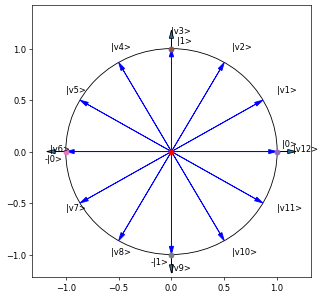

In [4]:
#
# your code is here
#
%run qlatvia.py

draw_qubit()

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

rotation_angle = pi/6

for i in range(1,13):
    # rotate the qubit with angle pi/4
    qc.ry(2*rotation_angle,q[0]) 
    
    # read the current quantum state
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state=job.result().get_statevector(qc) 
    
    # print the current quantum state    
    x_value = current_quantum_state[0].real # get the amplitude of |0>
    y_value = current_quantum_state[1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")


Repeat Task 3 for the angle $ 3\pi/8 $ by applying the rotation 16 times.

iteration 1 : the quantum state is ( 0.383 ) |0> +( 0.924 ) |1>
iteration 2 : the quantum state is ( -0.707 ) |0> +( 0.707 ) |1>
iteration 3 : the quantum state is ( -0.924 ) |0> +( -0.383 ) |1>
iteration 4 : the quantum state is ( -0.0 ) |0> +( -1.0 ) |1>
iteration 5 : the quantum state is ( 0.924 ) |0> +( -0.383 ) |1>
iteration 6 : the quantum state is ( 0.707 ) |0> +( 0.707 ) |1>
iteration 7 : the quantum state is ( -0.383 ) |0> +( 0.924 ) |1>
iteration 8 : the quantum state is ( -1.0 ) |0> +( 0.0 ) |1>
iteration 9 : the quantum state is ( -0.383 ) |0> +( -0.924 ) |1>
iteration 10 : the quantum state is ( 0.707 ) |0> +( -0.707 ) |1>
iteration 11 : the quantum state is ( 0.924 ) |0> +( 0.383 ) |1>
iteration 12 : the quantum state is ( 0.0 ) |0> +( 1.0 ) |1>
iteration 13 : the quantum state is ( -0.924 ) |0> +( 0.383 ) |1>
iteration 14 : the quantum state is ( -0.707 ) |0> +( -0.707 ) |1>
iteration 15 : the quantum state is ( 0.383 ) |0> +( -0.924 ) |1>
iteration 16 : the quantum stat

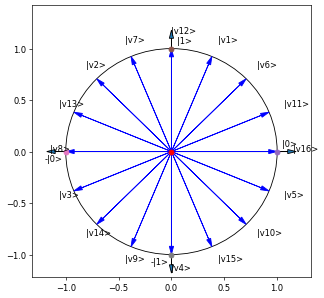

In [5]:
%run qlatvia.py

draw_qubit()

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

rotation_angle = 3*pi/8

for i in range(1,17):
    # rotate the qubit with angle pi/4
    qc.ry(2*rotation_angle,q[0]) 
    
    # read the current quantum state
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state=job.result().get_statevector(qc) 
    
    # print the current quantum state    
    x_value = current_quantum_state[0].real # get the amplitude of |0>
    y_value = current_quantum_state[1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")


Repeat Task 3 for the angle $ \sqrt{2}\pi $ by applying the rotation 20 times. 

iteration 1 : the quantum state is ( 0.156 ) |0> +( 0.988 ) |1>
iteration 2 : the quantum state is ( -0.951 ) |0> +( 0.308 ) |1>
iteration 3 : the quantum state is ( -0.453 ) |0> +( -0.892 ) |1>
iteration 4 : the quantum state is ( 0.81 ) |0> +( -0.586 ) |1>
iteration 5 : the quantum state is ( 0.705 ) |0> +( 0.709 ) |1>
iteration 6 : the quantum state is ( -0.59 ) |0> +( 0.807 ) |1>
iteration 7 : the quantum state is ( -0.889 ) |0> +( -0.457 ) |1>
iteration 8 : the quantum state is ( 0.313 ) |0> +( -0.95 ) |1>
iteration 9 : the quantum state is ( 0.987 ) |0> +( 0.161 ) |1>
iteration 10 : the quantum state is ( -0.005 ) |0> +( 1.0 ) |1>
iteration 11 : the quantum state is ( -0.989 ) |0> +( 0.151 ) |1>
iteration 12 : the quantum state is ( -0.303 ) |0> +( -0.953 ) |1>
iteration 13 : the quantum state is ( 0.894 ) |0> +( -0.448 ) |1>
iteration 14 : the quantum state is ( 0.582 ) |0> +( 0.813 ) |1>
iteration 15 : the quantum state is ( -0.712 ) |0> +( 0.702 ) |1>
iteration 16 : the quantu

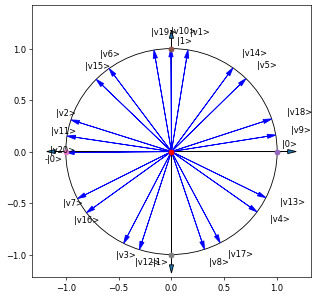

In [7]:
%run qlatvia.py

draw_qubit()

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

rotation_angle = 2**(0.5)

for i in range(1,21):
    # rotate the qubit with angle pi/4
    qc.ry(2*rotation_angle,q[0]) 
    
    # read the current quantum state
    job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state=job.result().get_statevector(qc) 
    
    # print the current quantum state    
    x_value = current_quantum_state[0].real # get the amplitude of |0>
    y_value = current_quantum_state[1].real # get the amplitude of |1>
    print("iteration",i,": the quantum state is (",round(x_value,3),") |0>","+(",round(y_value,3),") |1>")
    
    # draw the current quantum state
    draw_quantum_state(x_value,y_value,"|v"+str(i)+">")


<h3> Task 5 (discussion) </h3>

Let us define a rotation angle as $ \theta_\alpha = \alpha \cdot (2\pi) $.

When starting in state $ \ket{0} $ and applying the rotation with angle $ \theta_\alpha $ arbitrarily many times, the state $ \ket{0} $ can be visited again or not? 
- For which values of $\alpha$ will the state $\ket{0}$ be visited?
- For which values of $\alpha$ will the state $\ket{0}$  never be visited?

<h3> Task 6 </h3>

We randomly pick an angle $ \theta \in [0,2\pi) $.

We have two separate qubits initially set to state $ \ket{0} $. 

The first qubit is rotated by the angle $ \theta $ and the second qubit is rotated by the angle $ \theta + \pi/2 $.

Implement each qubit and its rotation as a separate quantum circuit.

Then, read both quantum states and calculate their dot product.

Check the result of the dot product for different random angles.

In [8]:
#
# your code is here
#
from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer


# implement the experiment 10 times
for i in range(10):
    # pick a random angle
    random_angle = randrange(3600)/10

    # specify the angles
    rotation_angle1 = random_angle/360*2*pi
    rotation_angle2 = rotation_angle1 + pi/2
    
    #
    # first qubit
    #
    q1 =  QuantumRegister(1) 
    c1 = ClassicalRegister(1) 
    qc1 = QuantumCircuit(q1,c1)
    
    # rotate the qubit
    qc1.ry(2 * rotation_angle1,q1[0])
    
    # read the quantum state
    job = execute(qc1,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state1=job.result().get_statevector(qc1) 
    [x1,y1]=[current_quantum_state1[0].real,current_quantum_state1[1].real]
    
    #
    # second qubit 
    #
    q2 =  QuantumRegister(1) 
    c2 = ClassicalRegister(1) 
    qc2 = QuantumCircuit(q2,c2)
    
    # rotate the qubit    
    qc2.ry(2 * rotation_angle2,q2[0])
        
    # read the quantum state
    job = execute(qc2,Aer.get_backend('statevector_simulator'),optimization_level=0)
    current_quantum_state2=job.result().get_statevector(qc2) 
    [x2,y2]=[current_quantum_state2[0].real,current_quantum_state2[1].real]

        
    #
    # dot product
    #
    print(i,"- the result of dot product is ",round(x1*x2+y1*y2,5))
    print("random angle is",random_angle)
    print("x1 , y1 =",round(x1,5),round(y1,5))
    print("x2 , y2 =",round(x2,5),round(y2,5))
    print()

0 - the result of dot product is  0.0
random angle is 245.6
x1 , y1 = -0.4131 -0.91068
x2 , y2 = 0.91068 -0.4131

1 - the result of dot product is  0.0
random angle is 248.5
x1 , y1 = -0.3665 -0.93042
x2 , y2 = 0.93042 -0.3665

2 - the result of dot product is  0.0
random angle is 65.7
x1 , y1 = 0.41151 0.9114
x2 , y2 = -0.9114 0.41151

3 - the result of dot product is  0.0
random angle is 137.8
x1 , y1 = -0.7408 0.67172
x2 , y2 = -0.67172 -0.7408

4 - the result of dot product is  0.0
random angle is 357.1
x1 , y1 = 0.99872 -0.05059
x2 , y2 = 0.05059 0.99872

5 - the result of dot product is  0.0
random angle is 70.4
x1 , y1 = 0.33545 0.94206
x2 , y2 = -0.94206 0.33545

6 - the result of dot product is  0.0
random angle is 205.3
x1 , y1 = -0.90408 -0.42736
x2 , y2 = 0.42736 -0.90408

7 - the result of dot product is  -0.0
random angle is 3.8
x1 , y1 = 0.9978 0.06627
x2 , y2 = -0.06627 0.9978

8 - the result of dot product is  0.0
random angle is 23.9
x1 , y1 = 0.91425 0.40514
x2 , y2 

<h3> Task 7 </h3>

We randomly pick an angle $ \theta \in [0,2\pi) $.

We have a single qubit initially set to state $ \ket{0} $. 

The qubit is rotated by the angle either $ \theta_1 =  \theta $ or $ \theta_2 =  \theta-\pi/2 $.

You are allowed to do one more rotation $ \theta' $ and then make a measurement.

Can you determine the angle of the first rotation angle by looking/using the measurement result? Is it $ \theta_1 $ or $ \theta_2 $?

Check your solution for different random angles.

In [9]:
from random import randrange
from math import pi
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

random_angle = randrange(3600)/10
rotation_angle1 = random_angle/360*2*pi
rotation_angle2 = rotation_angle1 - pi/2

# we define a quantum circuit with one qubit and one bit
q =  QuantumRegister(1) # quantum register with a single qubit
c = ClassicalRegister(1) # classical register with a single bit
qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

if randrange(2)==0:
    qc.ry(2 * rotation_angle1,q[0])
    picked_angle = "theta1"
else:
    qc.ry(2 * rotation_angle2,q[0])
    picked_angle = "theta2"

#
# your code is here
#
your_guess = ""

qc.ry(-2 * rotation_angle1,q[0]) # the new state will be either |0> or -|1>

qc.measure(q,c)

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
counts = job.result().get_counts(qc)
print(counts)

if '0' in counts:
    your_guess = "theta1"
else:
    your_guess = "theta2"


######################
print("your guess is",your_guess)
print("picked_angle is",picked_angle)

{'0': 100}
your guess is theta1
picked_angle is theta1
